In [3]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
import seaborn as sns

# Transformada inversa para distribucion uniforme

Función Acumulativa: 0.333333333333333*z


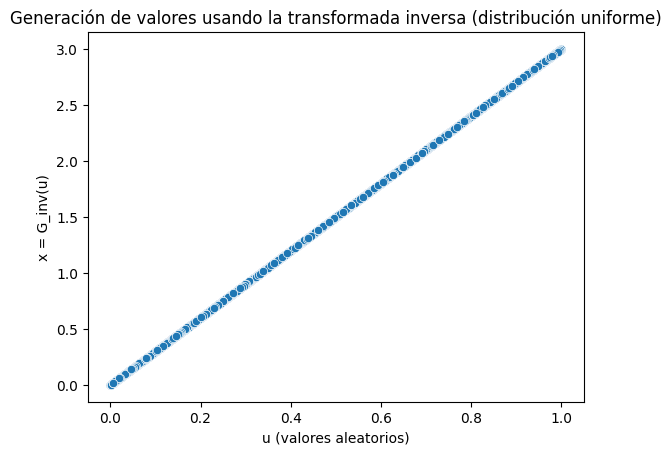

In [11]:

# Definimos las constantes y la función
lim_sup = 5
lim_inf = 2
z = sp.symbols('z')

# Definimos la función de densidad uniforme
g = (1 / (lim_sup - lim_inf)) * z**0

# Calculamos la función acumulativa de g(z)
G_acum = sp.integrate(g, z)
print(f"Función Acumulativa: {G_acum}")

# Definimos la variable para la inversa de G_acum y resolvemos para encontrar la inversa
u = sp.symbols('u')
inverse_g = sp.solve(G_acum - u, z)

# Generamos una muestra de valores pseudoaleatorios distribuidos uniformemente y aplicamos la función inversa
rand_vals = np.random.uniform(0, 1, 10000)
G_inv_func = sp.lambdify(u, inverse_g[0], modules="numpy")
sample_X = G_inv_func(rand_vals)

# Graficamos los valores generados con Seaborn
sns.scatterplot(x=rand_vals, y=sample_X)

# Etiquetas y título
plt.xlabel('u (valores aleatorios)')
plt.ylabel('x = G_inv(u)')
plt.title('Generación de valores usando la transformada inversa (distribución uniforme)')
plt.show()


---

### Transformada Inversa para Distribución Uniforme

La transformada inversa se utiliza para generar valores a partir de una distribución uniforme en un intervalo específico \([a, b]\). En este caso:

1. **Definición de la Función de Densidad:** Primero definimos la función de densidad uniforme \(f(x) = \frac{1}{b - a}\) para el intervalo dado.
2. **Cálculo de la Función de Distribución Acumulada (CDF):** Integramos la función de densidad para obtener la función de distribución acumulada \(F(x)\).
3. **Resolución de la Inversa de la CDF:** Despejamos \(x\) en términos de \(y\) (o \(F(x)\)) para obtener la inversa \(F^{-1}(y)\), lo cual permite mapear valores aleatorios uniformemente distribuidos \([0, 1]\) al intervalo deseado.
4. **Aplicación de la Inversa y Gráfica:** Generamos una muestra de valores \(R\) uniformemente distribuidos entre 0 y 1, los cuales pasamos a través de la inversa de la CDF para obtener valores distribuidos uniformemente en \([a, b]\). Finalmente, graficamos los valores obtenidos.

Esta técnica es común para simular distribuciones uniformes en una variedad de aplicaciones en simulación y análisis de datos.

---

# Transformada inversa con distribucion exponencial

Función acumulada: 1.0 - 1.0*exp(-0.2*z)
Función inversa: 5.0*log(-1/(v - 1.0))


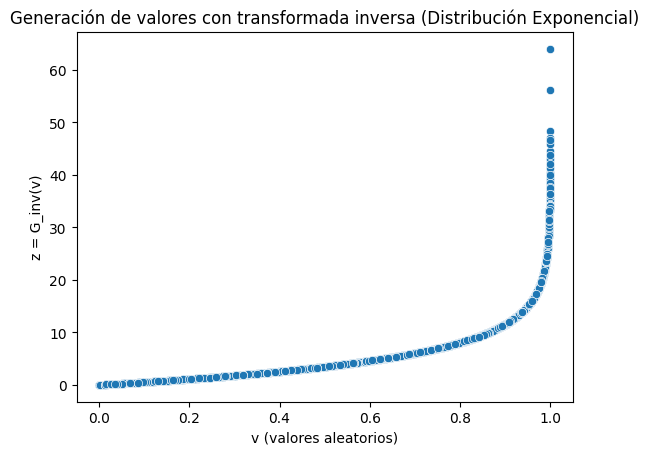

In [ ]:

# Definimos el parámetro de la distribución exponencial
limite = 5
param = 1 / limite  # 1/limite es el parámetro de la función exponencial
z = sp.symbols('z')

# Definimos la función de densidad para la distribución exponencial
g = param * sp.exp(-param * z)

# Calculamos la función de distribución acumulada
G_acum = sp.integrate(g, (z, 0, z))
print("Función acumulada:", G_acum)

# Definimos la variable para resolver la inversa de la acumulada
v = sp.symbols('v')
inverse_g = sp.solve(G_acum - v, z)[0]
print("Función inversa:", inverse_g)

# Generamos una muestra de valores aleatorios uniformemente distribuidos y aplicamos la función inversa
random_vals = np.random.random(100000)
G_inv_func = sp.lambdify(v, inverse_g, modules="numpy")
generated_vals = G_inv_func(random_vals)

# Graficamos los valores generados
sns.scatterplot(x=random_vals, y=generated_vals)

# Etiquetas y título
plt.xlabel('v (valores aleatorios)')
plt.ylabel('z = G_inv(v)')
plt.title('Generación de valores con transformada inversa (Distribución Exponencial)')
plt.show()


---

### Transformada Inversa para Distribución Exponencial

La transformada inversa también es efectiva para generar valores a partir de una distribución exponencial, caracterizada por un parámetro \(\lambda\) que define su tasa de decaimiento:

1. **Definición de la Función de Densidad:** Definimos la función de densidad exponencial \(f(x) = \lambda e^{-\lambda x}\), donde \(\lambda = \frac{1}{b}\) para un parámetro de escala \(b\).
2. **Cálculo de la Función de Distribución Acumulada (CDF):** Integramos la función de densidad para obtener la función de distribución acumulada \(F(x)\), que en el caso exponencial es \(F(x) = 1 - e^{-\lambda x}\).
3. **Despeje para Obtener la Inversa:** Despejamos \(x\) en términos de \(y\) (o \(F(x)\)) y obtenemos la inversa de la CDF, que es \(F^{-1}(y) = -\frac{1}{\lambda} \ln(1 - y)\).
4. **Generación de Muestra y Gráfica:** Generamos valores \(R\) distribuidos uniformemente entre 0 y 1, aplicamos la inversa de la CDF a estos valores para obtener una muestra de valores exponencialmente distribuidos, y graficamos los resultados.

La distribución exponencial es fundamental en la modelización de tiempos de espera y fenómenos de decaimiento en diversas disciplinas.

---

# Transformada inversa para la distribucion de Bernoulli

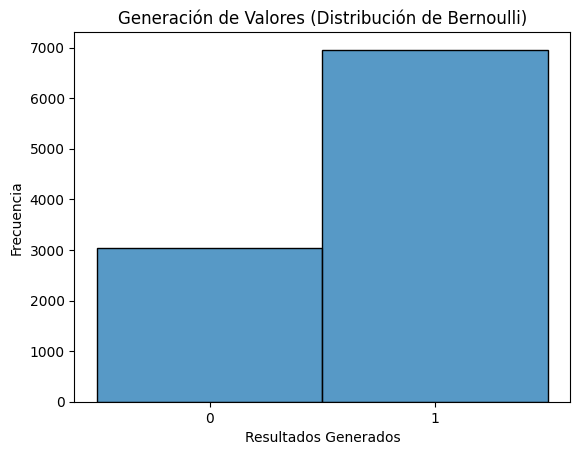

In [17]:

# Definimos la probabilidad de éxito para la distribución de Bernoulli
prob_exito = 0.7  # Probabilidad de obtener 1

# Generamos una muestra de números aleatorios entre 0 y 1
random_vals = np.random.uniform(0, 1, 10000)

# Aplicamos la función inversa de la CDF de Bernoulli
samples = (random_vals < prob_exito).astype(int)  # 1 si random_vals < prob_exito, de lo contrario 0

# Graficamos la distribución obtenida
sns.histplot(data=samples, discrete=True)
plt.xticks([0, 1])
plt.xlabel('Resultados Generados')
plt.ylabel('Frecuencia')
plt.title('Generación de Valores (Distribución de Bernoulli)')
plt.show()


---

### Transformada Inversa para Distribución de Bernoulli

La distribución de Bernoulli es una distribución discreta que describe experimentos con dos posibles resultados (éxito o fracaso), con una probabilidad de éxito \(p\):

1. **Definición del Parámetro de Probabilidad:** Establecemos el valor de \(p\), la probabilidad de obtener un éxito (por ejemplo, 1).
2. **Generación de Valores Aleatorios Uniformes:** Generamos una muestra de valores \(R\) distribuidos uniformemente entre 0 y 1.
3. **Aplicación de la CDF para la Generación de Valores de Bernoulli:** Utilizamos una simple condición \(X = 1\) si \(R < p\) y \(X = 0\) en caso contrario. Este criterio corresponde a la aplicación de la CDF inversa de Bernoulli, donde valores de \(R\) por debajo de \(p\) indican éxito.
4. **Gráfica de Resultados:** Visualizamos la distribución de valores generados con un histograma, verificando la frecuencia de 0s y 1s en función de \(p\).

Esta técnica es útil para simular experimentos de tipo "éxito o fracaso" en sistemas que siguen una distribución de Bernoulli.

---